In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import random
import altair as alt
alt.renderers.enable('notebook')
from sklearn.preprocessing import StandardScaler

In [3]:
#isee_machine = pd.read_csv('./data/isee_machine_operation_enc.csv',encoding= 'cp949')
isee_machine = pd.read_csv('./data/isee_machine_operation_file21.csv')
isee_machine2 = isee_machine[isee_machine['Operation_label']==1]
isee_machine2['True_label']=isee_machine2['True_label'].replace({'N':1, 'Y':-1})

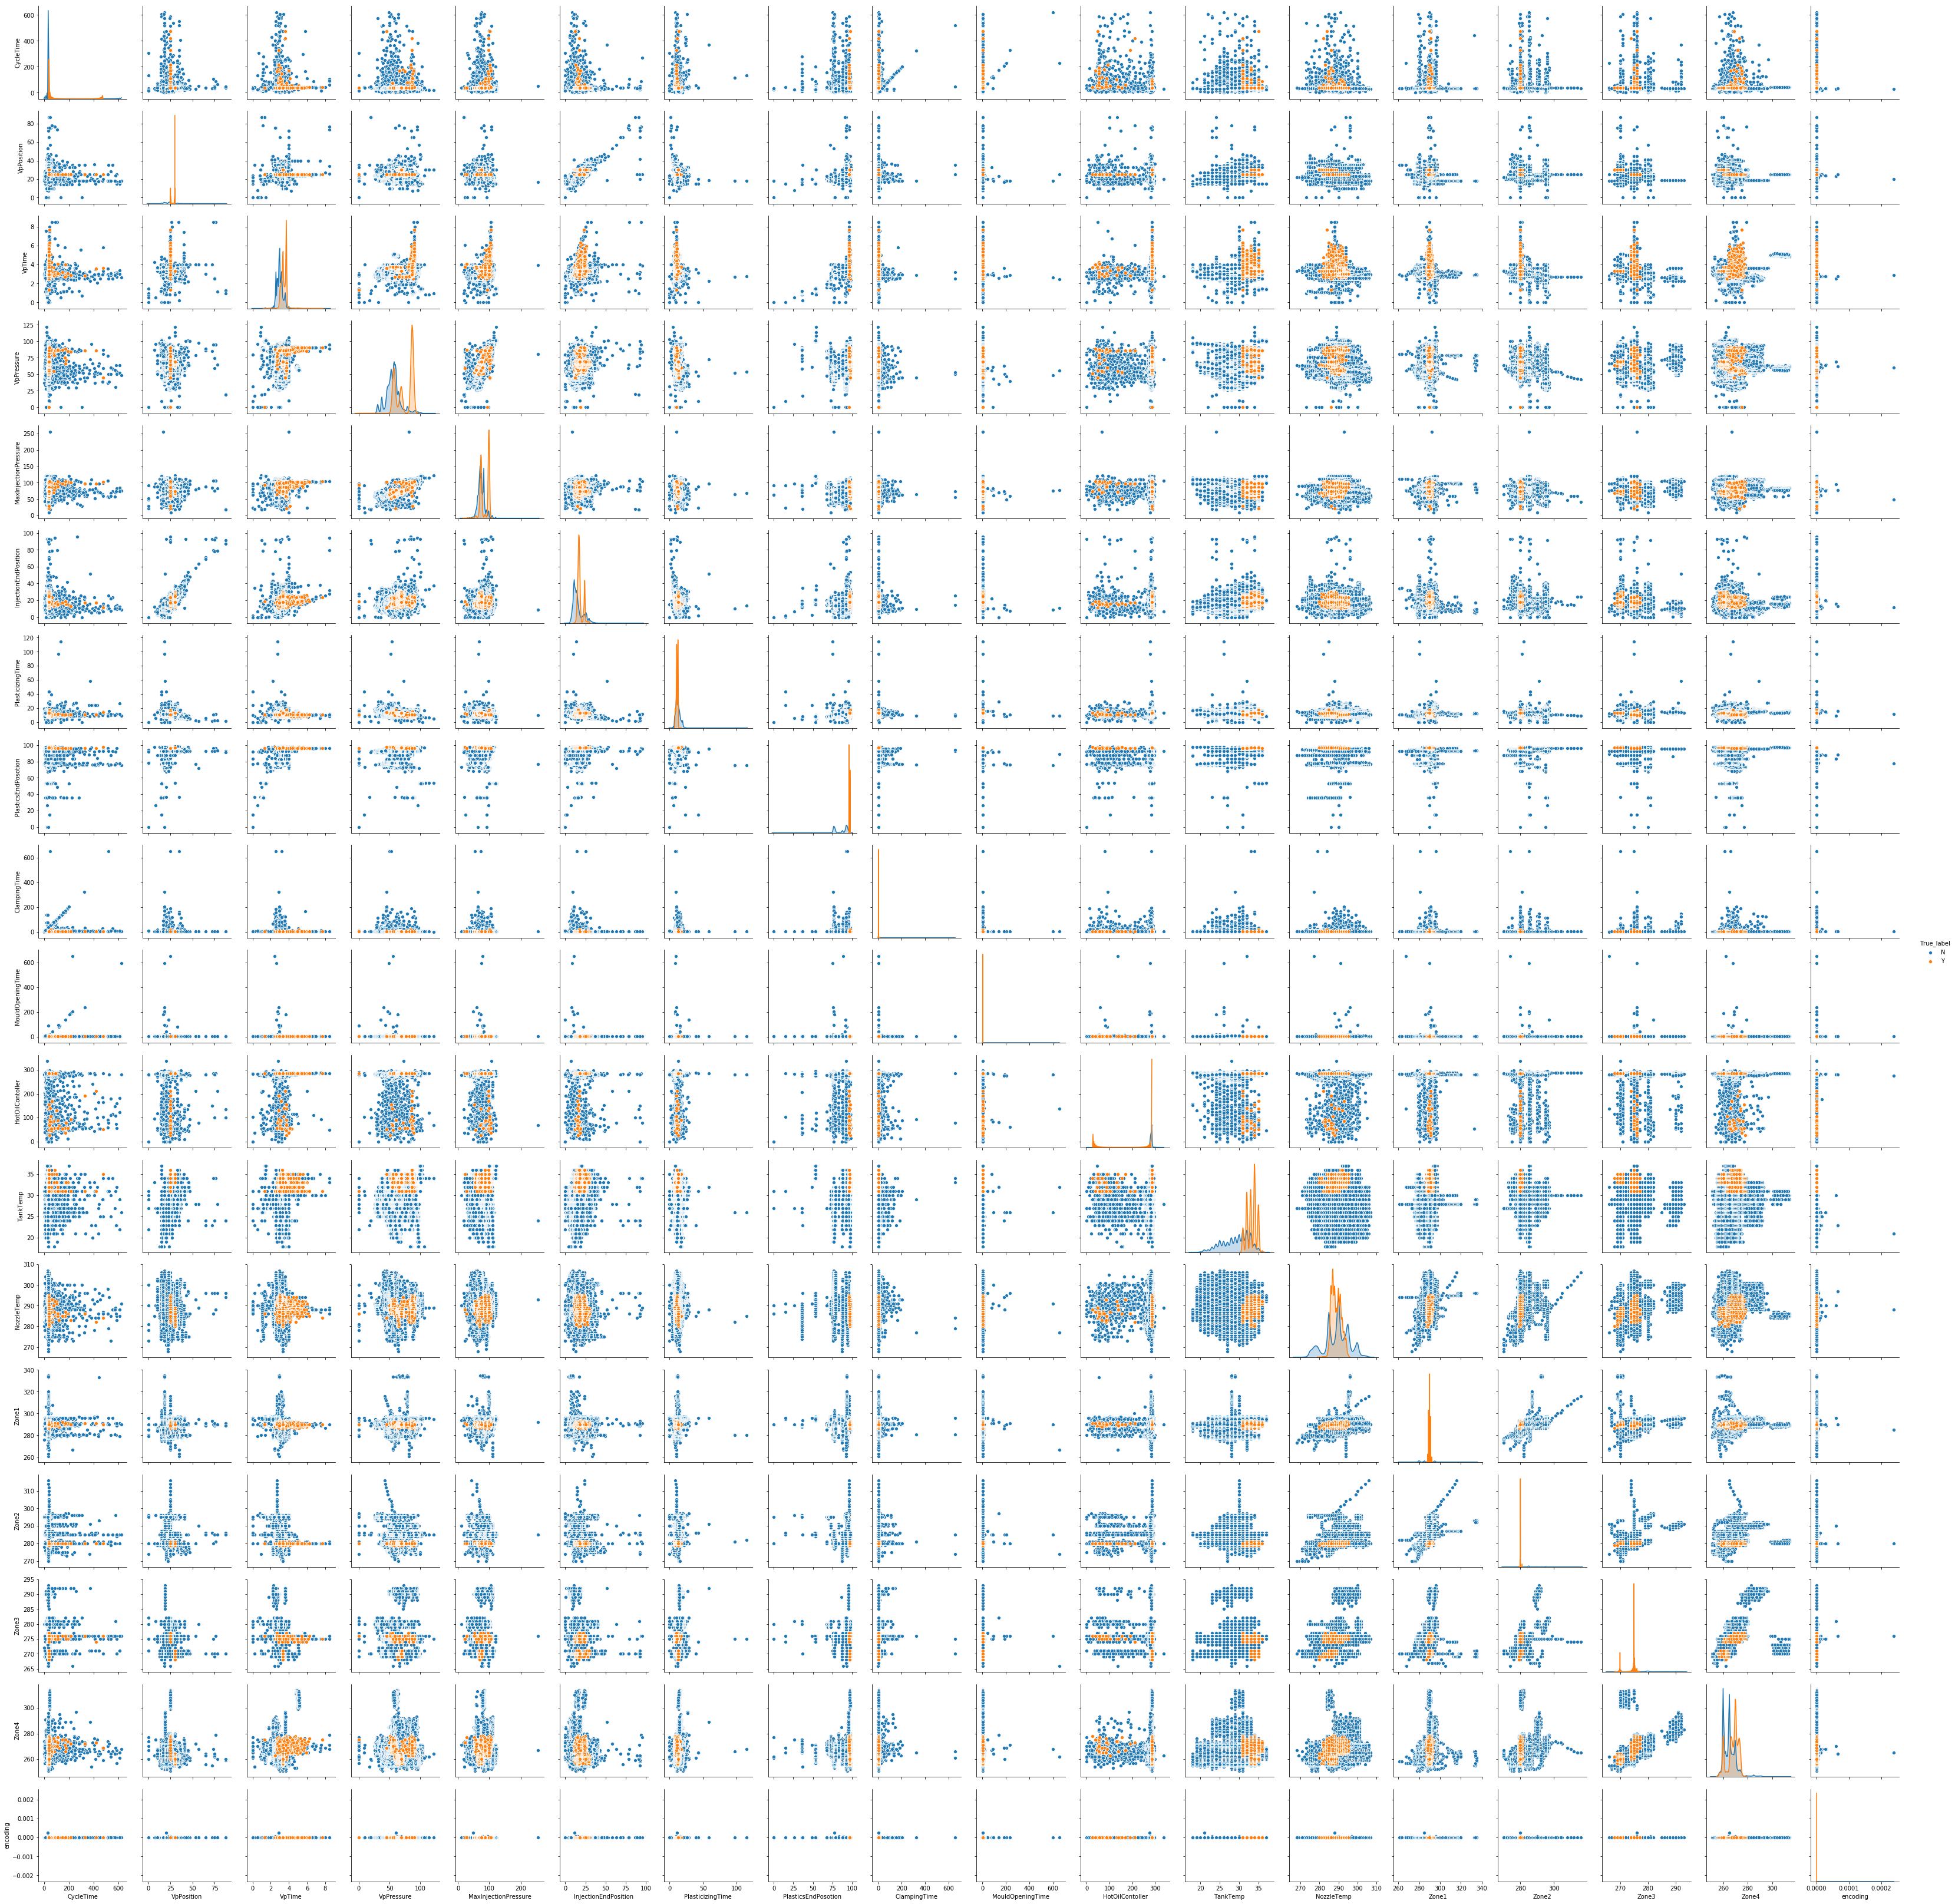

In [22]:
######## 진짜, 엄청 오래거림!!!! 10분 이상
plot_label = 'True_label'
fs_cols_ = feature.columns.tolist() + [plot_label]

sns.pairplot(isee_machine2[fs_cols_], hue = plot_label)

# DBSCAN

In [8]:
from sklearn.cluster import DBSCAN
import seaborn as sns

In [5]:
feature = isee_machine2[[ 'CycleTime', 'VpPosition', 'VpTime',
       'VpPressure', 'MaxInjectionPressure', 'InjectionEndPosition',
       'PlasticizingTime', 'PlasticsEndPosotion', 'ClampingTime',
       'MouldOpeningTime', 'HotOilContoller', 'TankTemp', 'NozzleTemp',
       'Zone1', 'Zone2', 'Zone3', 'Zone4', 'encoding']]
y_label = isee_machine2[['True_label','CycleNum']]

scaled_X = StandardScaler().fit_transform(feature)

len(feature), len(y_label), scaled_X.shape

C:\Users\ARA\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ARA\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(233556, 233556, (233556, 18))

In [7]:
################################################################################## DBSCAN
%%time

model = DBSCAN(eps=0.5, min_samples=30)
predict_db = pd.DataFrame(model.fit_predict(scaled_X), index=feature.index)
predict_db.columns= ['predict_DB']

print('총 ', len(predict_db['predict_DB'].unique()), ' 개의 군집!')
################################################################################## 

총  203  개의 군집!


In [ ]:
################################################################################## HDBSCAN
import hdbscan

hdbs = hdbscan.HDBSCAN(min_cluster_size=1000, allow_single_cluster=True)
hdbs.fit(scaled_X)

predict_hdb = pd.DataFrame(hdbs.labels_, index=feature.index)
predict_hdb.columns= ['predict_HDB']

print('총 ', len(np.unique(hdbs.labels_)), ' 개의 군집!')
################################################################################## 

In [ ]:
#pd.concat([isee_machine2,predict],axis=1).to_csv('./data/isee_machine_operation_DBSCAN.csv',index = False)

In [12]:
pd.DataFrame(predict_hdb.groupby('predict_HDB')['predict_HDB'].count())

predict_HDB
predict_HDB             
-1                 33930
 0                  4392
 1                  1196
 2                 17793
 3                 14356
 4                  1589
 5                  1931
 6                  2336
 7                  3654
 8                  2061
 9                   899
 10                 3190
 11                61512
 12                 1125
 13                 2582
 14                 2776
 15                 6118
 16                 1236
 17                11853
 18                 1448
 19                 2000
 20                 2723
 21                 4856
 22                 8906
 23                 3803
 24                15297
 25                 1256
 26                 2543
 27                 1131
 28                 1259
 29                 2809
 30                 3641
 31                 4669
 32                 2686

In [13]:
# concatenate labels to df as a new column
r = pd.concat([feature,predict_db, predict_hdb, y_label],axis=1)

In [120]:
print(r[r['CycleNum']==6].predict.unique())
print(r[r['CycleNum']==9].predict.unique())
print(r[r['CycleNum']==13].predict.unique())

print(isee_machine.loc[r[r['predict']<=0].index].creationDate.unique())
print(isee_machine.loc[r[r['predict']==1].index].creationDate.unique())
print(isee_machine.loc[r[r['predict']==2].index].creationDate.unique())
print(isee_machine.loc[r[r['predict']==3].index].creationDate.unique())
print(isee_machine.loc[r[r['predict']==4].index].creationDate.unique())

print(isee_machine.loc[r[(r['predict']>=0) & (r['predict']<=11)].index].creationDate.unique())

print(isee_machine.loc[r[(r['predict']>=0) & (r['predict']<=11)].index].CycleNum.unique())

print(isee_machine.loc[r[r['predict']==0].index].CycleNum.unique())
print(isee_machine.loc[r[r['predict']==1].index].CycleNum.unique())
print(isee_machine.loc[r[r['predict']==2].index].CycleNum.unique())
print(isee_machine.loc[r[r['predict']==3].index].CycleNum.unique())
print(isee_machine.loc[r[r['predict']==4].index].CycleNum.unique())

print(isee_machine.loc[r[r['predict']!=-1].index].CycleNum.unique())

isee_machine.loc[r[r['predict'] ==4].index]['True_label'].unique()

[10 -1 23 29]
[10 -1]
[-1 23]


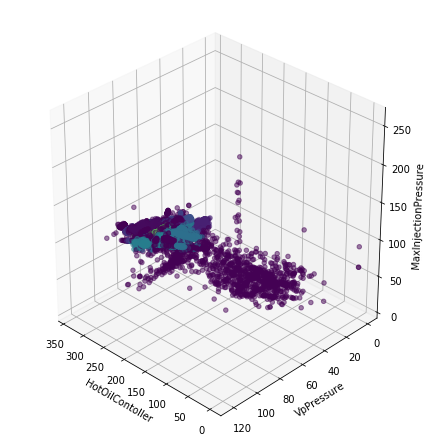

In [14]:
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=134)
ax.scatter(r['HotOilContoller'],r['VpPressure'],r['MaxInjectionPressure'],c=r['predict_HDB'],alpha=0.5)
ax.set_xlabel('HotOilContoller')
ax.set_ylabel('VpPressure')
ax.set_zlabel('MaxInjectionPressure')
plt.show()

In [76]:
print(isee_machine.loc[r[r['predict']!=-1].index].CycleNum.unique())

[  6  11  12  13  22  24  25  26  33  35  40  45  46  47  48  49  50  51
  54  57  62  63  64  67  69  77  81  84  85  86  87  88 149]


In [54]:
isee_machine.loc[r[r['predict'] ==4].index]['True_label'].unique()

array(['Y'], dtype=object)

In [15]:
r_de1 = r[r['predict_HDB']!=-1]

In [16]:
r_on1 = r[r['predict_HDB'] == -1]

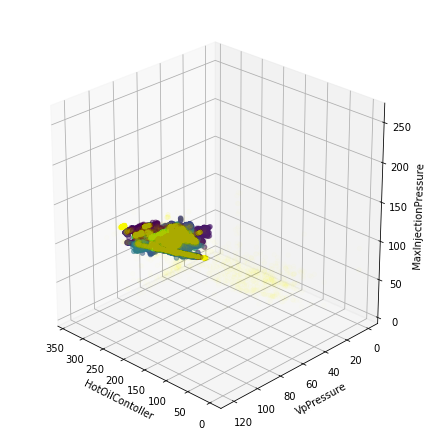

In [17]:
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=25, azim=134)
ax.scatter(r_de1['HotOilContoller'],r_de1['VpPressure'],r_de1['MaxInjectionPressure'],c=r_de1['predict_HDB'],alpha=0.5)
ax.set_xlabel('HotOilContoller')
ax.set_ylabel('VpPressure')
ax.set_zlabel('MaxInjectionPressure')


ax.scatter(r_on1['HotOilContoller'],r_on1['VpPressure'],r_on1['MaxInjectionPressure'],c='yellow',alpha=0.01)
plt.show()

# T SNE 시각화

In [1]:
import import_ipynb
from isee_def import draw_tsne

importing Jupyter notebook from isee_def.ipynb


In [19]:
n = 5000   # 랜덤으로 n개 추출
randIdx = random.sample(range(len(r)), n)

In [ ]:
%%time
tsne_result, plots = draw_tsne(scaled_X, y_label['True_label'].values, randIdx)

In [20]:
%%time
tsne_result, plots = draw_tsne(feature.values, predict_hdb['predict_HDB'].values, randIdx)

Wall time: 3min 58s


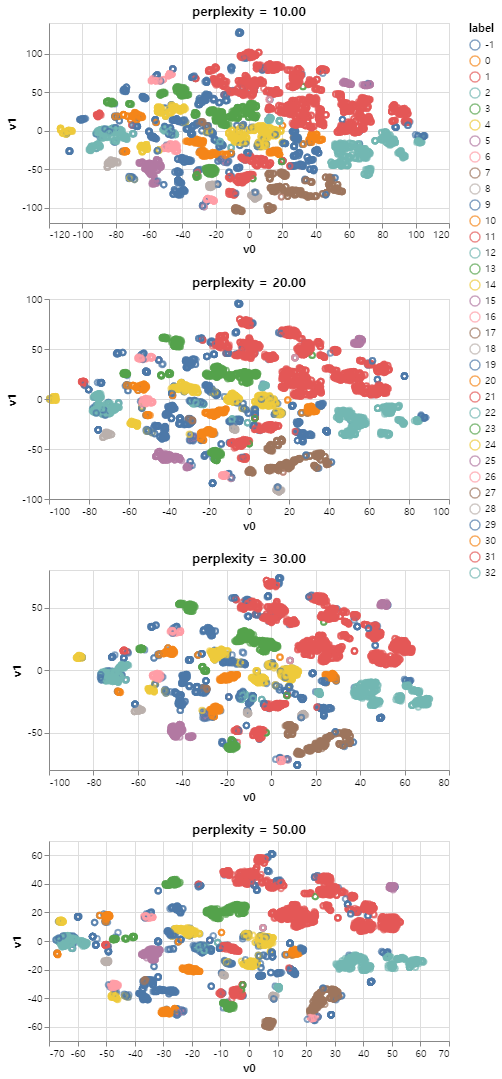

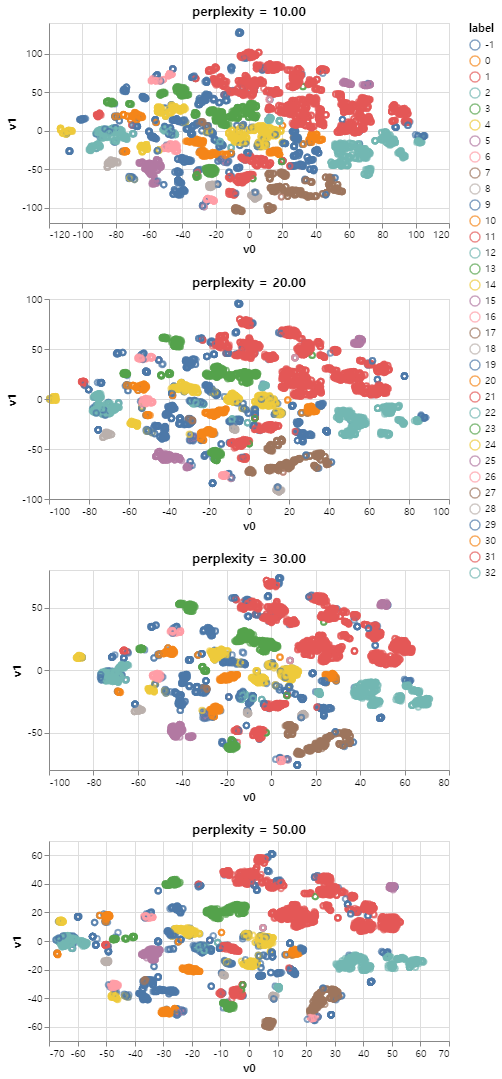

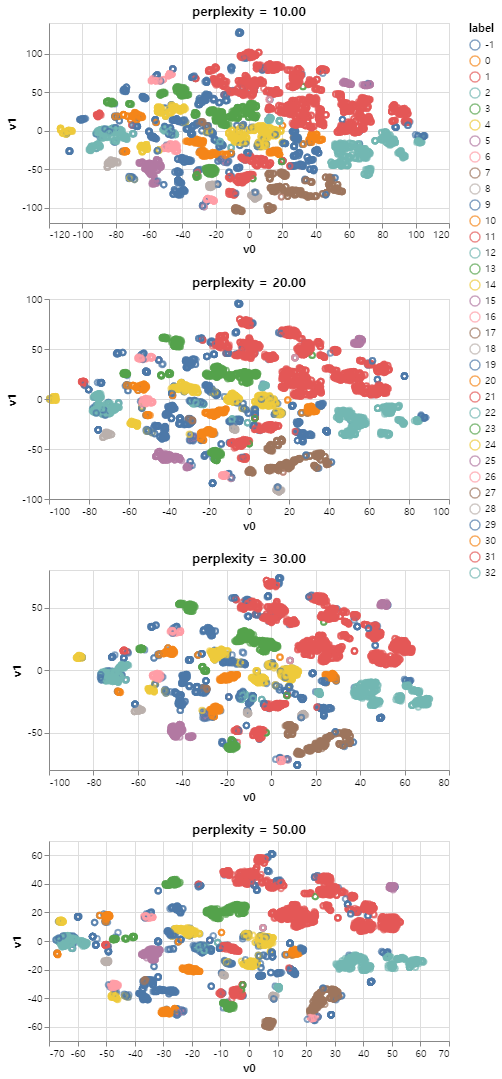

In [21]:
alt.vconcat(plots[0],plots[1],plots[2],plots[3])

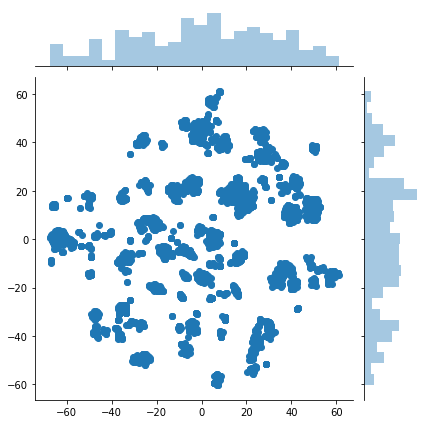

In [22]:
color_palette = sns.color_palette('hls', len(np.unique(hdbs.labels_)))
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in hdbs.labels_[randIdx]]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, hdbs.probabilities_[randIdx])]
#plt.scatter(*tsne_result[50].T, s=30, linewidth=0, c=cluster_member_colors, alpha=0.25, label=cluster_member_colors)
sns.jointplot(tsne_result[50].T[0], tsne_result[50].T[1])

In [23]:
len(np.unique(cluster_member_colors))

6018

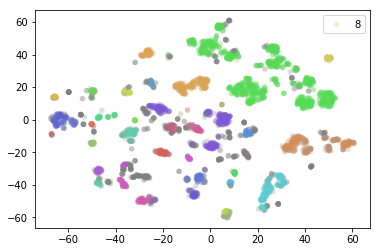

In [24]:
plt.scatter(*tsne_result[50].T, s=30, linewidth=0, c=cluster_member_colors, alpha=0.25)
plt.legend(hdbs.labels_[randIdx])

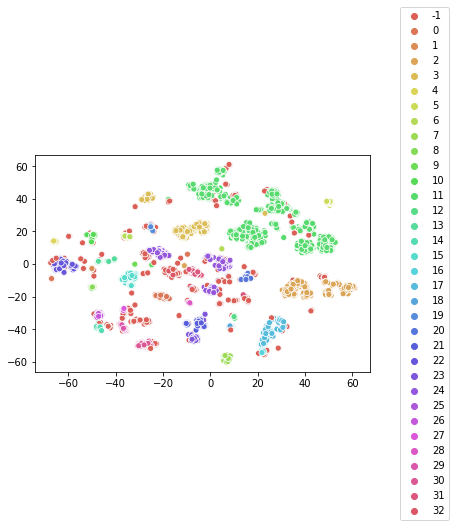

In [25]:
g= sns.scatterplot(tsne_result[50].T[0], tsne_result[50].T[1], hue=hdbs.labels_[randIdx], legend='full', palette=color_palette)
g.legend(loc='right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

In [26]:
hdbs.labels_[randIdx]

array([ 8, -1,  3, ..., 14,  2, -1], dtype=int64)

In [27]:
alt.Chart(df_tsne_result).encode(x='v0:Q',y='v1:Q', color='label:N').properties(width=400, height=200, title='perplexity = {:.2f}'.format(perplexity))

NameError: name 'df_tsne_result' is not defined

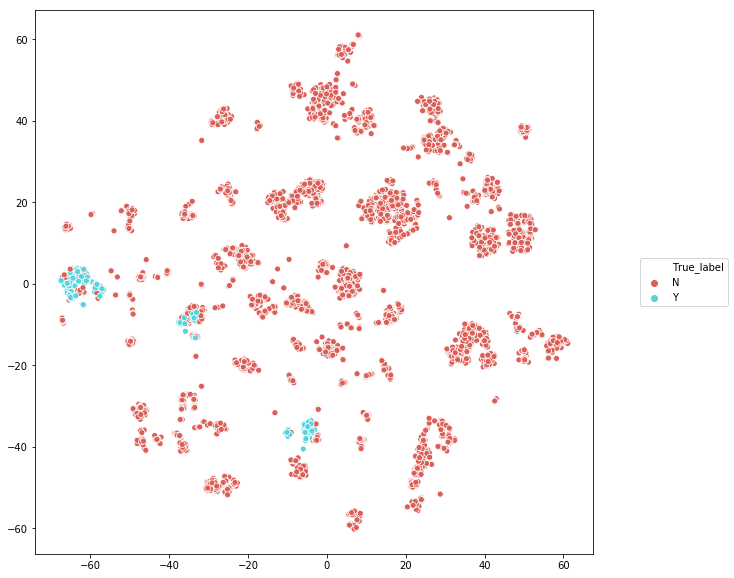

In [28]:
plt.figure(figsize=(10,10))
col = 'True_label'

clr_palette = sns.color_palette('hls', len(isee_machine2[col][randIdx].unique()))
g= sns.scatterplot(tsne_result[50].T[0], tsne_result[50].T[1], hue=isee_machine2[col][randIdx], legend='full', palette=clr_palette)
g.legend(loc='right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()